In [5]:
# Core
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.4)
from imblearn.over_sampling import SMOTE
import itertools
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import time

In [60]:
# Sklearn
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, r2_score
from sklearn.metrics import roc_auc_score, plot_confusion_matrix, plot_roc_curve, roc_curve, mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.utils import resample

# Models
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB

In [11]:
train_df = pd.read_csv("mobile_run_predict/train.csv")
test_df = pd.read_csv("mobile_run_predict/test.csv")

In [12]:
train_df.head()

,id,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,0,23.059782,6,140,110,2815,17.977429,80,1,dodge aspen
1,3,17.674521,8,350,150,4456,13.514535,72,1,dodge rampage
2,4,17.136353,8,302,140,2774,13.209912,79,1,mercury cougar brougham
3,7,22.664666,6,400,85,2190,15.196381,71,1,pontiac j2000 se hatchback
4,9,17.872018,8,429,220,2245,9.621400,70,1,ford galaxie 500


In [13]:
train_df.info()
print("*" * 100)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            500 non-null    int64  
 1   mpg           500 non-null    float64
 2   cylinders     500 non-null    int64  
 3   displacement  500 non-null    int64  
 4   horsepower    500 non-null    object 
 5   weight        500 non-null    int64  
 6   acceleration  500 non-null    float64
 7   model year    500 non-null    int64  
 8   origin        500 non-null    int64  
 9   car name      500 non-null    object 
dtypes: float64(2), int64(6), object(2)
memory usage: 39.2+ KB
****************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            500 no

In [14]:
train_id = train_df["id"]
test_id = test_df["id"]

train_df.drop("id", axis=1, inplace=True)
test_df.drop("id", axis=1, inplace=True)

Text(0.5, 1.0, 'mile per gallon')

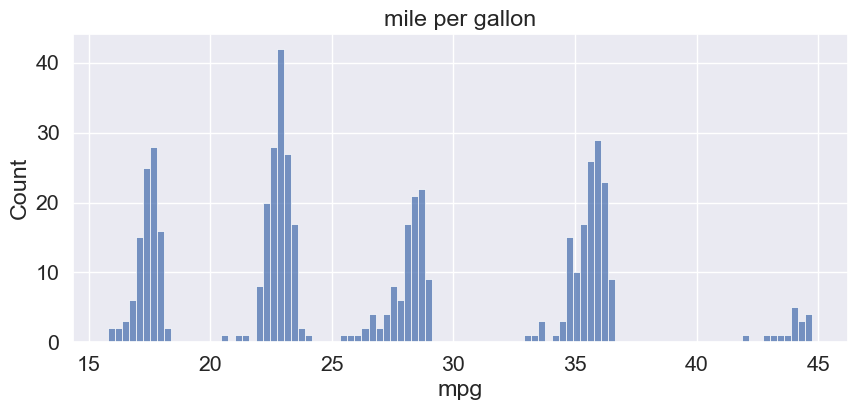

In [15]:
plt.figure(figsize=(10, 4))
sns.histplot(data=train_df, x="mpg", bins=100)
plt.title("mile per gallon")

Text(0.5, 1.0, 'Horse Power')

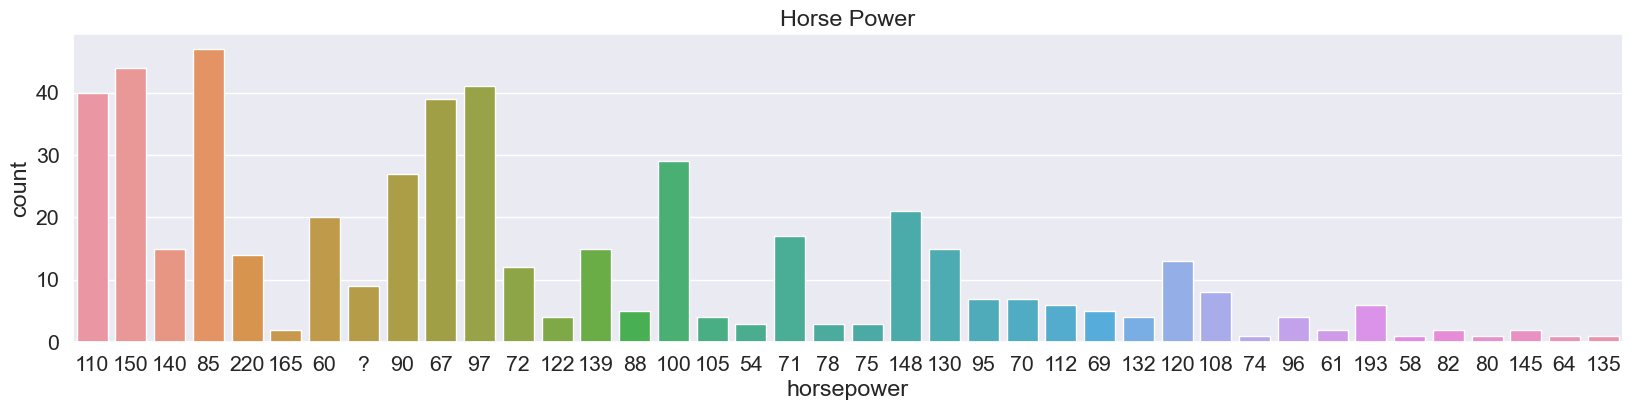

In [16]:
plt.figure(figsize=(20, 4))
sns.countplot(data=train_df, x="horsepower")
plt.title("Horse Power")

In [17]:
unknown_HP = len(train_df[train_df["horsepower"] == "?"])
print(unknown_HP)

9


In [18]:
train_df[train_df["horsepower"] == "?"]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
10,44.763897,4,85,?,1755,17.503013,80,2,renault lecar deluxe
48,23.008702,4,140,?,1760,19.472427,76,1,vw rabbit
224,28.146944,4,140,?,1760,19.420540,76,1,vw rabbit
286,44.021790,4,85,?,1955,20.795175,80,2,pontiac astro
320,44.410105,4,85,?,1955,21.057837,80,2,pontiac astro
407,28.048825,4,140,?,1760,19.139558,71,1,vw rabbit
415,28.079580,4,140,?,1760,17.268393,82,1,vw rabbit
455,27.536418,4,140,?,1760,19.243466,76,1,vw rabbit
487,27.725048,4,140,?,1760,19.532434,76,1,vw rabbit


Text(0.5, 1.0, 'horsepower in case of cylinders==4')

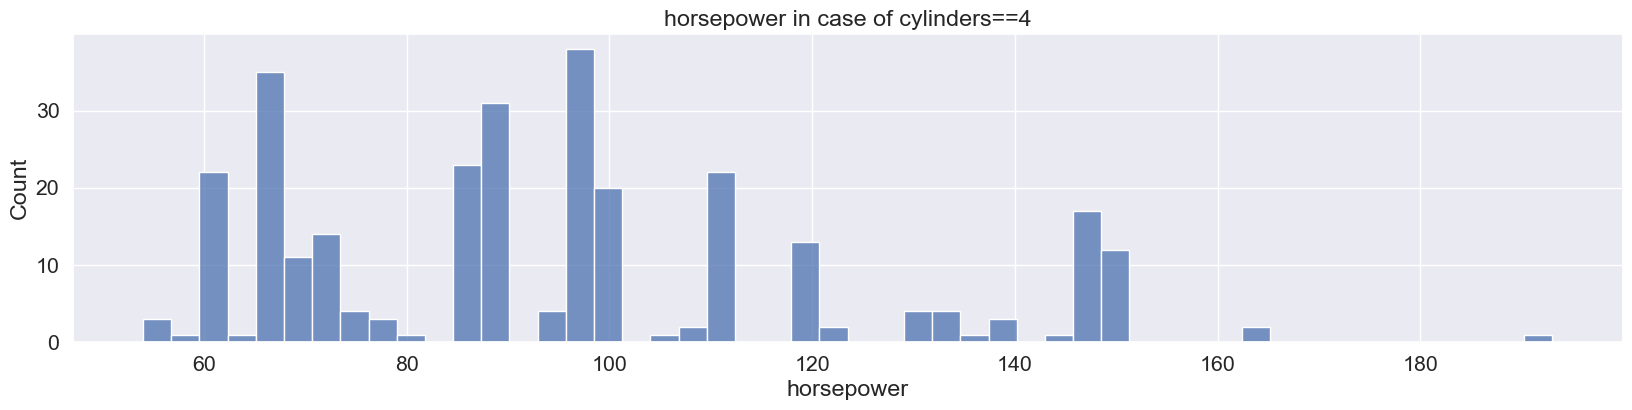

In [19]:
plt.figure(figsize=(20, 4))
train2_df = train_df[(train_df["cylinders"] == 4) & (train_df["horsepower"] != "?")]
train2_df["horsepower"] = train2_df["horsepower"].astype(int)
sns.histplot(data=train2_df, x="horsepower", bins=50)
plt.title("horsepower in case of cylinders==4")

In [20]:
comple_num_str = str(train2_df["horsepower"].mode().max())

In [21]:
train_df.loc[train_df["horsepower"] == "?", "horsepower"] = comple_num_str

In [22]:
test_df.loc[test_df["horsepower"] == "?", "horsepower"] = comple_num_str

Text(0.5, 1.0, 'Horse Power')

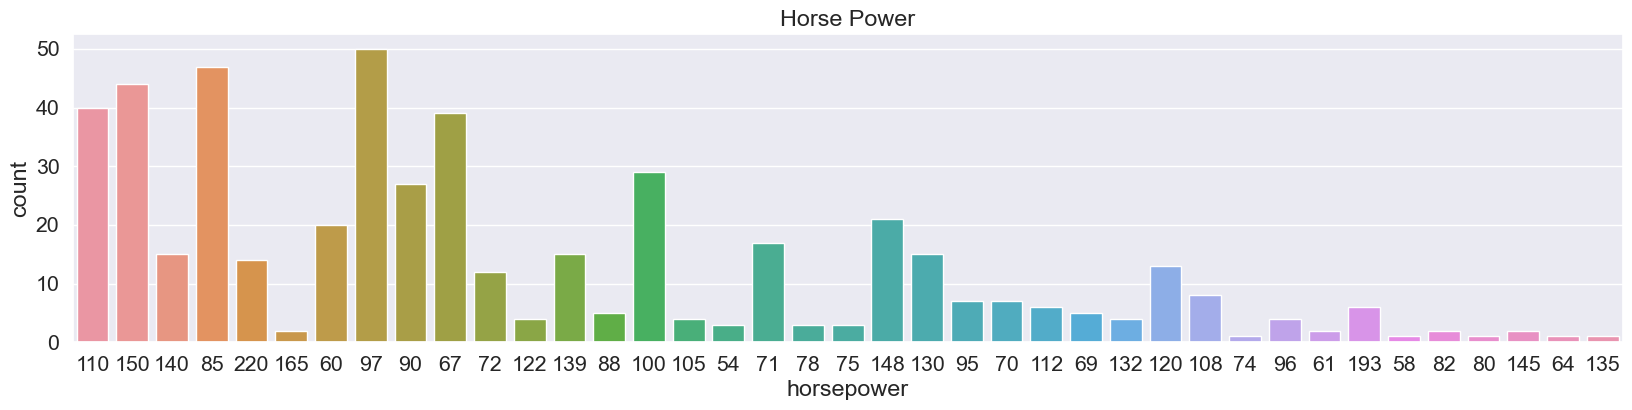

In [23]:
plt.figure(figsize=(20, 4))
sns.countplot(data=train_df, x="horsepower")
plt.title("Horse Power")

Text(0.5, 1.0, 'Horse Power')

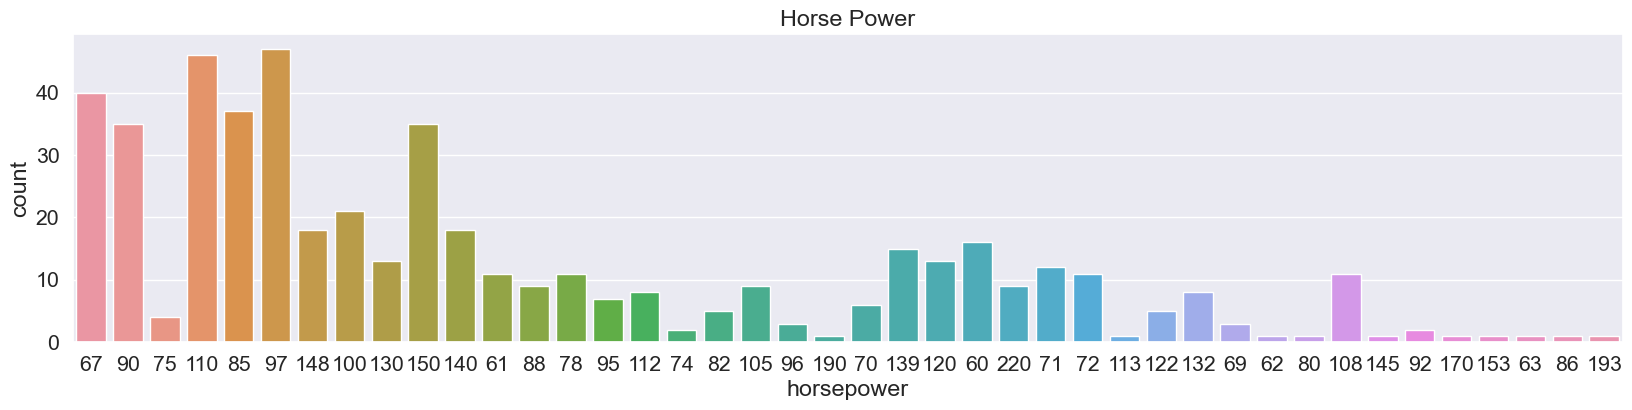

In [24]:
plt.figure(figsize=(20, 4))
sns.countplot(data=test_df, x="horsepower")
plt.title("Horse Power")

Text(0.5, 1.0, 'origin')

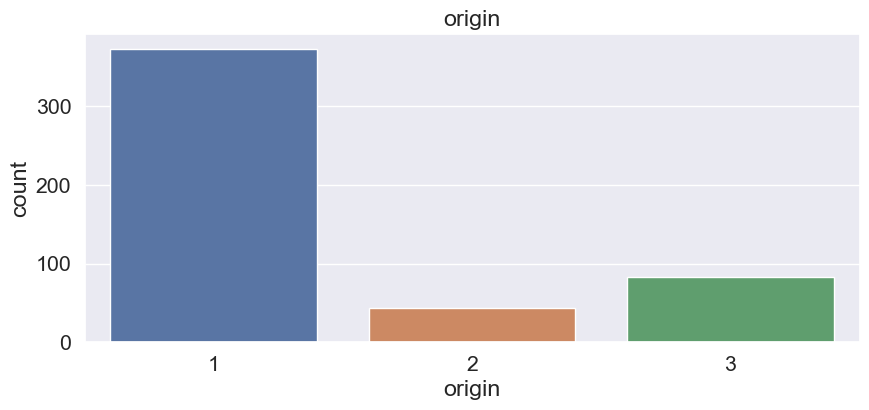

In [25]:
plt.figure(figsize=(10, 4))
sns.countplot(data=train_df, x="origin")
plt.title("origin")

Text(0.5, 1.0, 'Number of Cylinder')

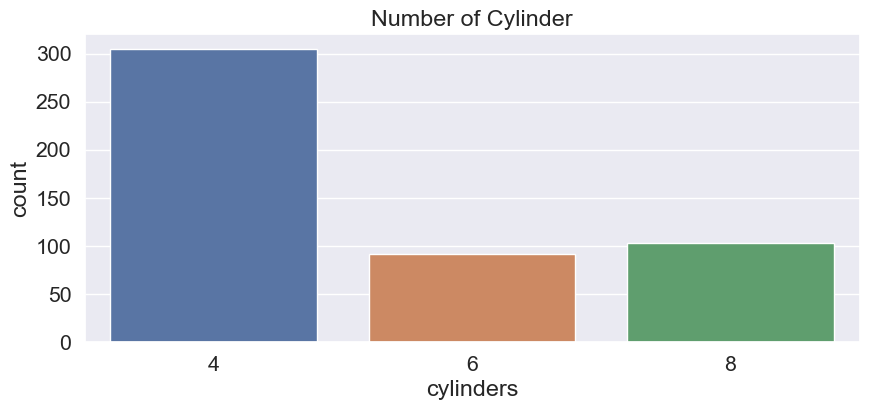

In [26]:
plt.figure(figsize=(10, 4))
sns.countplot(data=train_df, x="cylinders")
plt.title("Number of Cylinder")

Text(0.5, 1.0, 'Displacement')

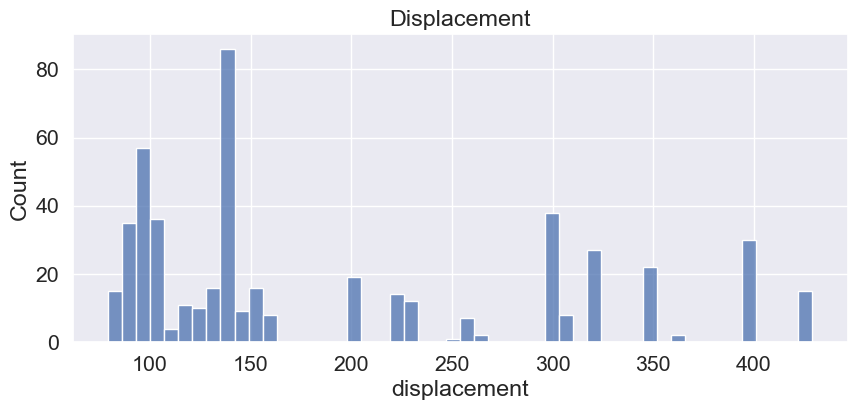

In [27]:
plt.figure(figsize=(10, 4))
sns.histplot(data=train_df, x="displacement", bins=50)
plt.title("Displacement")

<AxesSubplot: xlabel='acceleration', ylabel='Count'>

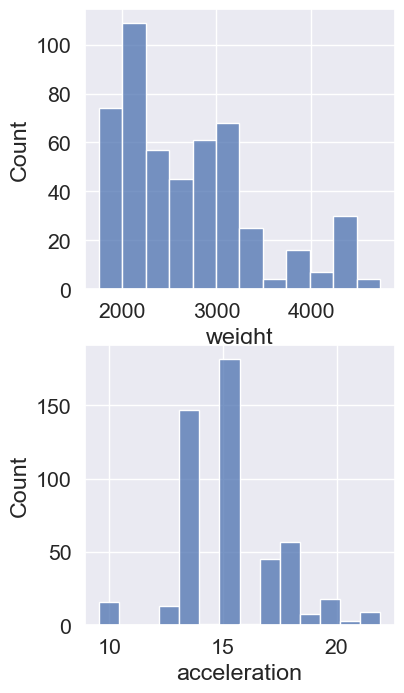

In [38]:
#weight and acceleration
plt.figure(figsize=(4, 8))
plt.subplot(2, 1, 1)
sns.histplot(data=train_df, x="weight")

plt.subplot(2, 1, 2)
sns.histplot(data=train_df, x="acceleration")

In [29]:
train_df["horsepower"] = train_df["horsepower"].astype("int64")
test_df["horsepower"] = test_df["horsepower"].astype("int64")

In [30]:
numerical_feats = train_df.columns[train_df.dtypes != "object"]
categorical_feats = train_df.columns[train_df.dtypes == "object"]

In [31]:
train_df[numerical_feats].corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.739658,-0.605029,-0.470498,-0.261404,0.344398,0.422820,0.454347
cylinders,-0.739658,1.000000,0.726896,0.543838,0.289985,-0.371380,-0.295352,-0.317010
displacement,-0.605029,0.726896,1.000000,0.468457,0.349656,-0.314126,-0.375943,-0.321787
horsepower,-0.470498,0.543838,0.468457,1.000000,0.197582,-0.391028,-0.236625,-0.280556
weight,-0.261404,0.289985,0.349656,0.197582,1.000000,0.023480,-0.230062,-0.116487
acceleration,0.344398,-0.371380,-0.314126,-0.391028,0.023480,1.000000,0.167045,0.073709
model year,0.422820,-0.295352,-0.375943,-0.236625,-0.230062,0.167045,1.000000,0.122374
origin,0.454347,-0.317010,-0.321787,-0.280556,-0.116487,0.073709,0.122374,1.000000


<AxesSubplot: >

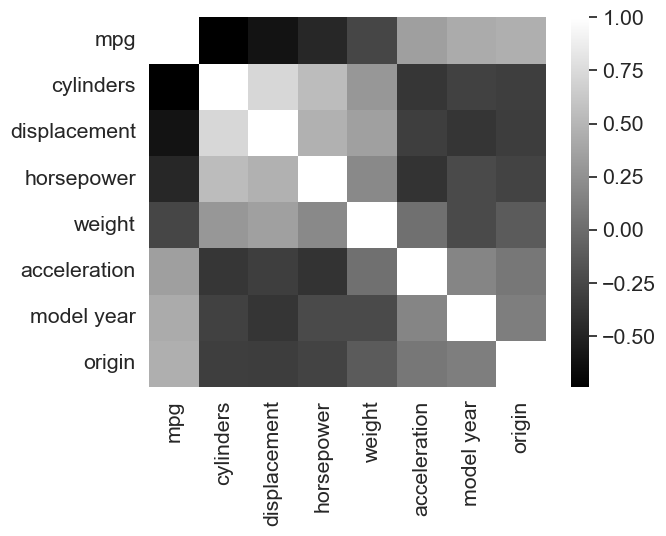

In [32]:
sns.heatmap(train_df[numerical_feats].corr(), cmap="gray")

In [39]:
train_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,23.059782,6,140,110,2815,17.977429,80,1,dodge aspen
1,17.674521,8,350,150,4456,13.514535,72,1,dodge rampage
2,17.136353,8,302,140,2774,13.209912,79,1,mercury cougar brougham
3,22.664666,6,400,85,2190,15.196381,71,1,pontiac j2000 se hatchback
4,17.872018,8,429,220,2245,9.621400,70,1,ford galaxie 500


In [41]:
#ひとまず car name 列を消します
train_df.drop("car name", axis=1, inplace=True)
test_df.drop("car name", axis=1, inplace=True)

In [44]:
#origin を one-hot-encoding
train_df["origin1"] = (train_df["origin"] == 1).astype(int)
train_df["origin2"] = (train_df["origin"] == 2).astype(int)
train_df["origin3"] = (train_df["origin"] == 3).astype(int)

test_df["origin1"] = (test_df["origin"] == 1).astype(int)
test_df["origin2"] = (test_df["origin"] == 2).astype(int)
test_df["origin3"] = (test_df["origin"] == 3).astype(int)

In [48]:
train_df.drop("origin", axis=1, inplace=True)
test_df.drop("origin", axis=1, inplace=True)

In [50]:
X = train_df.drop("mpg", axis=1).values
y = train_df["mpg"].values

In [52]:
X.shape

(500, 9)

In [56]:
y.shape

(500,)

In [57]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                      random_state=0)

In [61]:
#ひとまず前処理は終了、モデルに突っ込む
LR = LinearRegression()
LR.fit(X_train, y_train)
pred_LR = LR.predict(X_valid)
r2_LR = r2_score(y_valid, pred_LR)
mae_LR = mean_absolute_error(y_valid, pred_LR)

print("R2: ", r2_LR)
print("MAE: ", mae_LR)

R2:  0.5741136721965524
MAE:  3.872721529416406


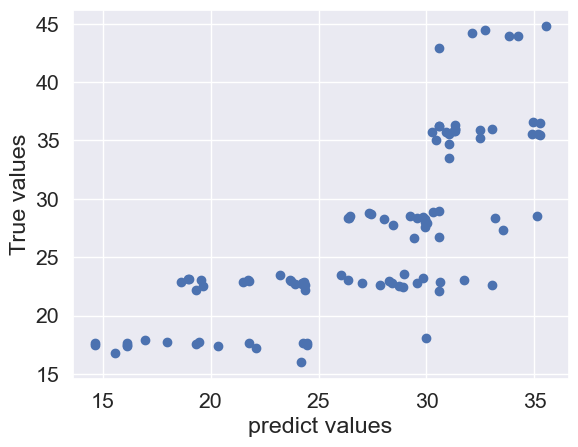

In [62]:
plt.scatter(pred_LR, y_valid)
plt.xlabel("predict values")
plt.ylabel("True values")
plt.show()